### architectural modifications
- explicit weighing of conjunctions in EM key
- EM value is taken from feed forward pathway 

In [1]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
emsetting=1
wmsize=4
instdim=10
stimdim=12
seed=2

net = NetBarCode(
        wmsize=wmsize,
        emsetting=emsetting,
        seed=seed,
        instdim=instdim,
        stimdim=stimdim,
        debug=False)

net.emk_weights = [1,.0001] # stim,lstm

nmaps = 5
switch = 1
task = TaskArbitraryMaps(
          nmaps,
          switchmaps=switch,
          ntokens_surplus=0,
          seed=seed,
          stimdim=stimdim)


In [3]:
neps = 20000
task.switchmaps = True
trsc = run_net(net,task,neps,2,3,training=True,verb=True)
trac = trsc[:,:,nmaps:].mean(2)

0.0 0.0
0.2 1.0
0.4 1.0
0.6 0.875
0.8 1.0


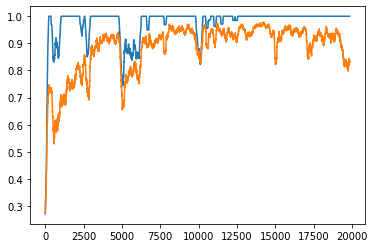

In [4]:
for tr_trac in trac.T:
  plt.plot(mov_avg(tr_trac,150))